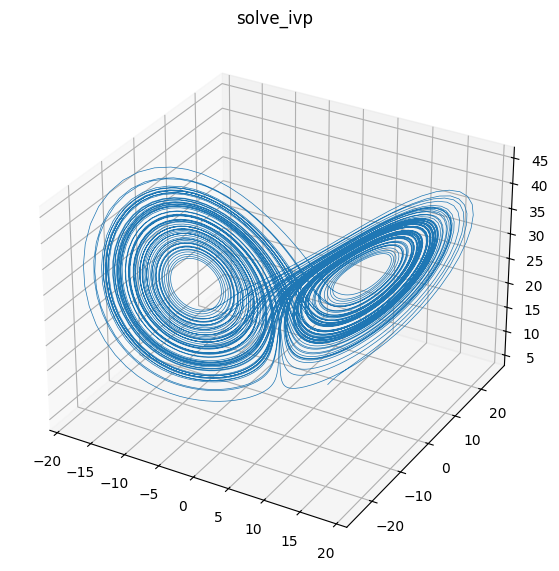

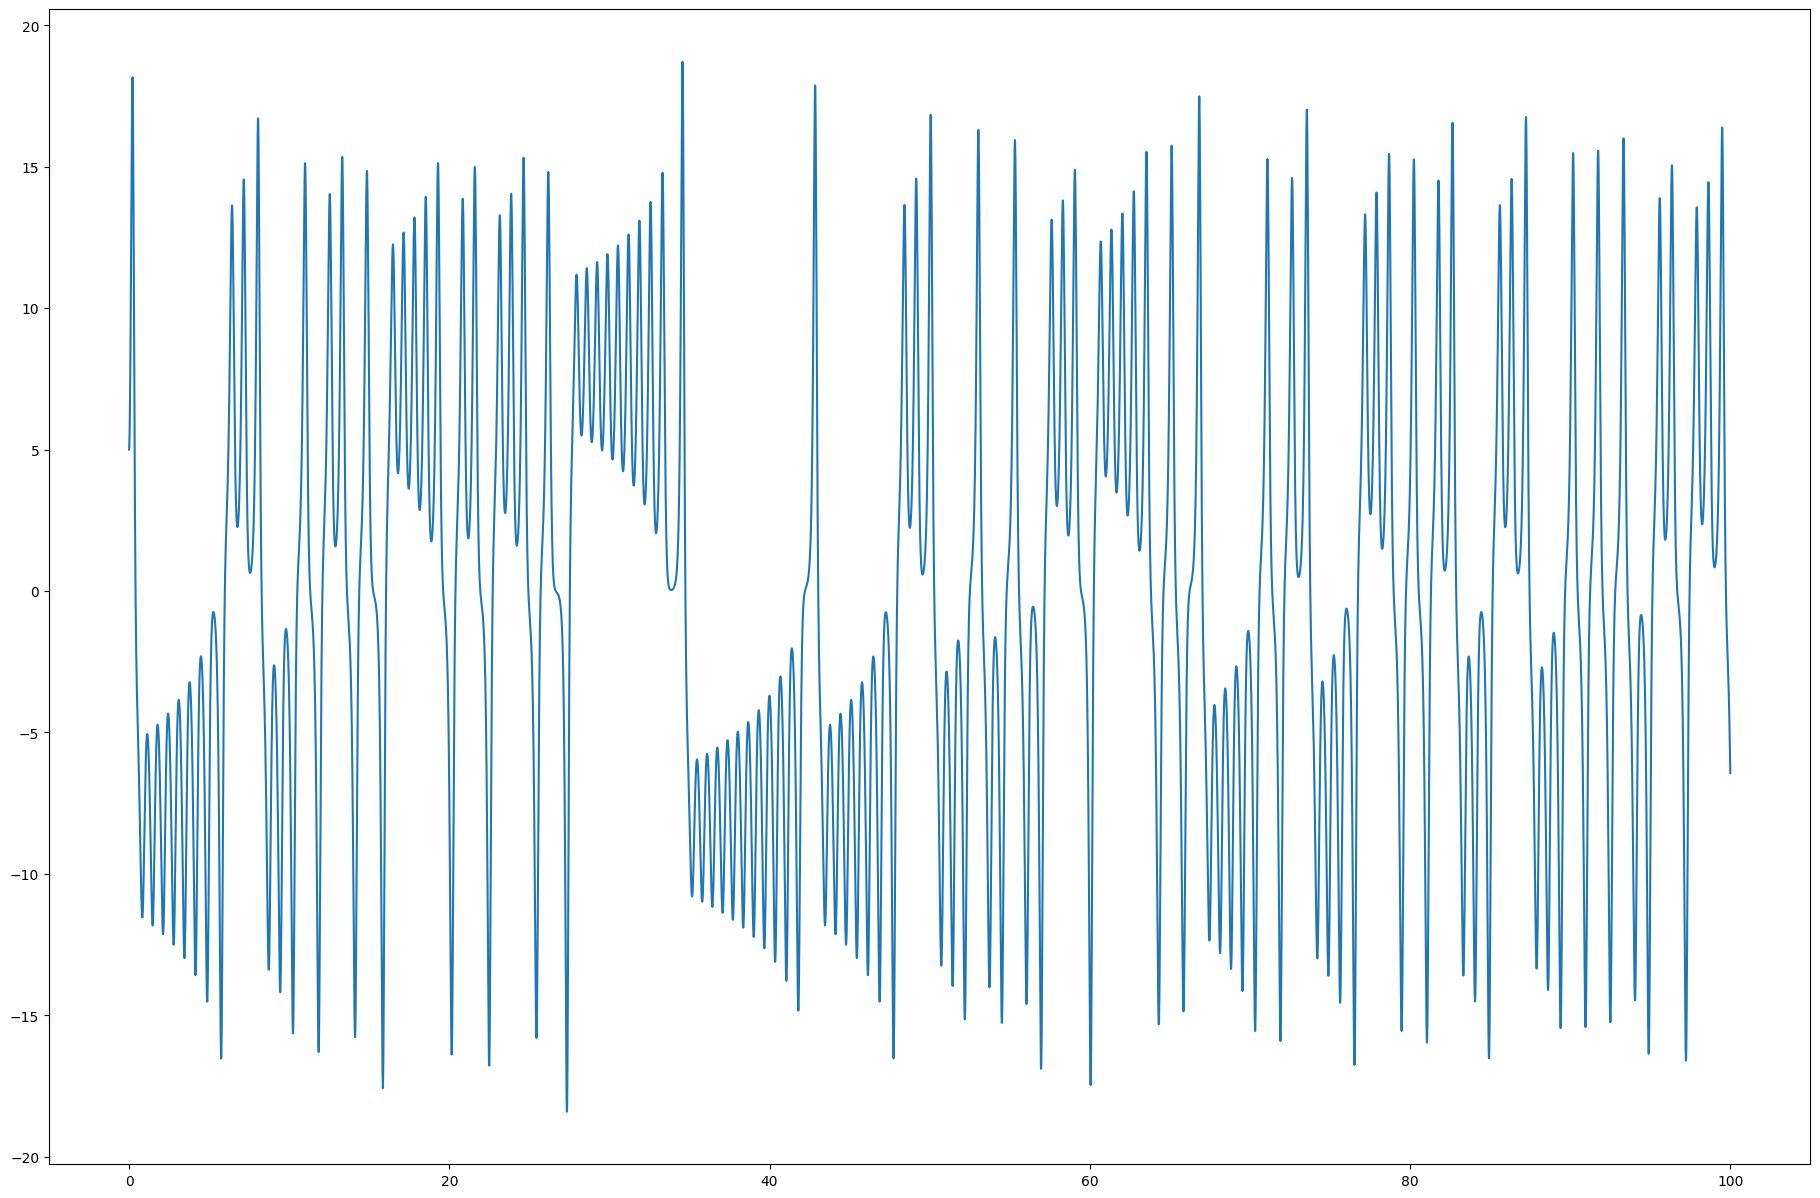

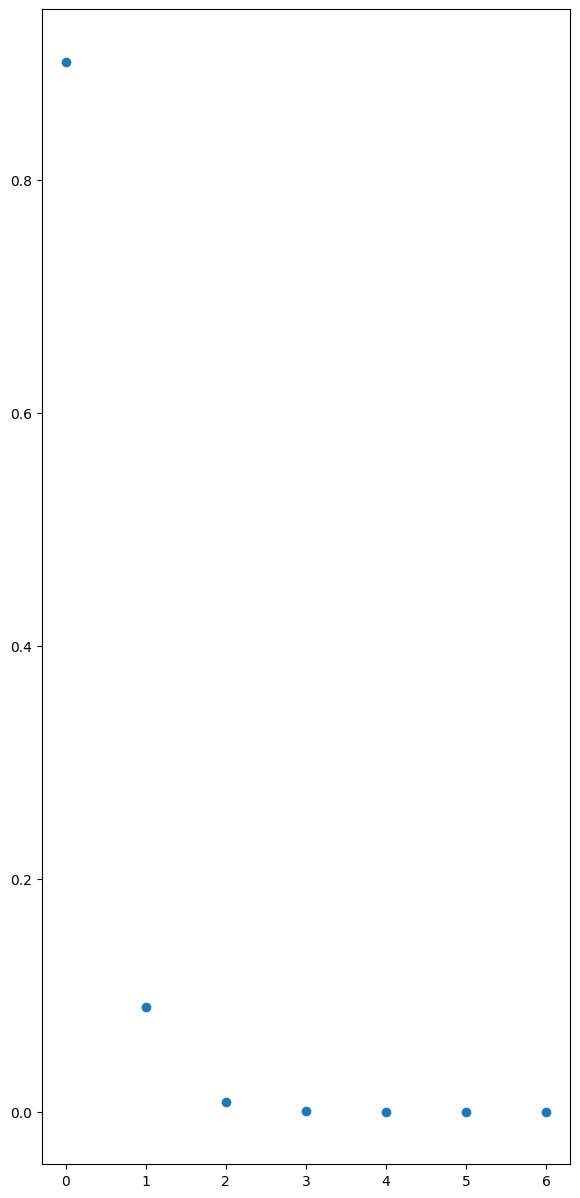

In [261]:

import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
 
def lorenz(t, state, sigma, beta, rho):
    x, y, z = state
     
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
     
    return [dx, dy, dz]
 
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0
 
p = (sigma, beta, rho)  # Parameters of the system
 
y0 = [5.0, 5.0, 5.0]  # Initial state of the system

t_span = (0.0, 100.0)
result_solve_ivp = solve_ivp(lorenz, t_span, y0, args=p,t_eval = np.linspace(0,100,10000))

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot(result_solve_ivp.y[0, :],
        result_solve_ivp.y[1, :],
        result_solve_ivp.y[2, :],linewidth=0.5)
ax.set_title("solve_ivp")

fig2 = plt.figure(figsize=(50, 15))
ax2 = fig2.add_subplot(1,2,2)
ax2.plot(np.linspace(0,100,10000),result_solve_ivp.y[0,:])

X = result_solve_ivp.y[0,:].T
H = np.zeros(shape = (7,5000))
for i in range(7): 
    H[i] = X[i:5000+i]

(u,s,v) = np.linalg.svd(H,full_matrices=False)

fig3 = plt.figure(figsize=(15, 15))
ax3 = fig3.add_subplot(1,2,2)
#ax3.set_ylim(bottom=0)
ax3.scatter(np.arange(0,7),s[:7]/np.sum(s))
#ax3.plot(u[:,0:5])


[3.55630469e+01 1.65066706e-01 9.97583820e-04 4.74389774e-06
 5.96718869e-07 1.81218055e-20 1.15762842e-23 8.24673714e-40
 0.00000000e+00 0.00000000e+00]


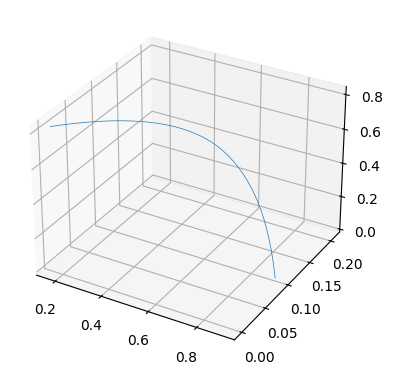

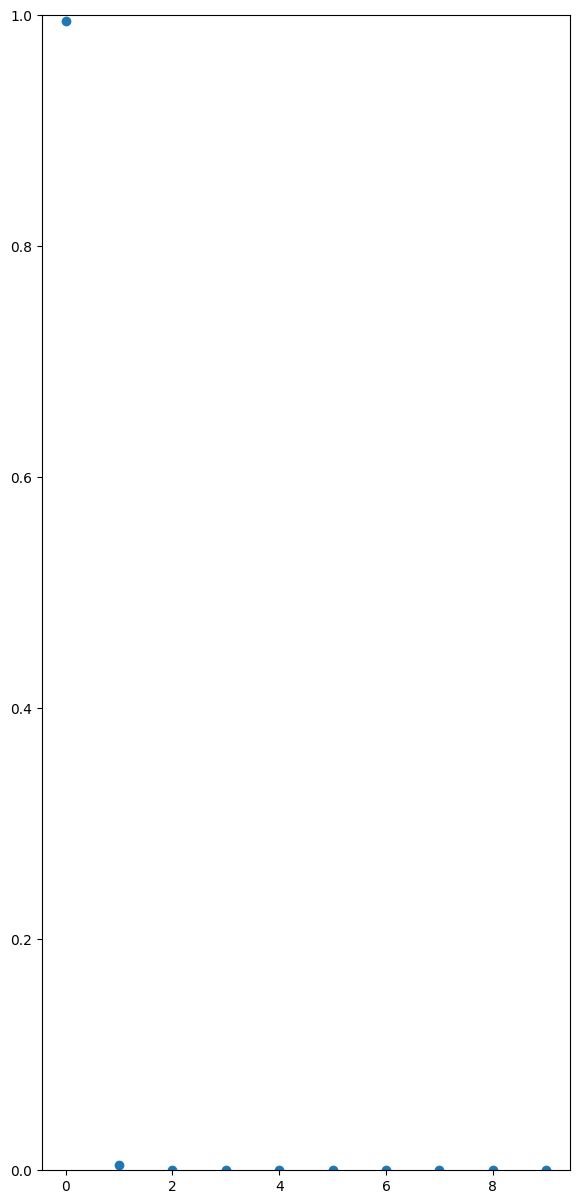

In [266]:
import pandas as pd

def SIR(t, state,beta,gamma):
        S,I,R = state #unpack the state variables
        N = S + I + R  #compute the total population

        '''The state transitions of the ODE model is below'''
        dS = -beta*(S*I)/N
        dI = beta*S*I/N-gamma*I
        dR = gamma*I

     
        return [dS, dI, dR]
 
beta = 0.2
gamma = 0.1



 
p = (beta, gamma) # Parameters of the system
 
y0 = [0.9,0.1, 0]  # Initial state of the system

t_span = (0.0, 1000.0)
result_solve_ivp = solve_ivp(SIR, t_span, y0, args=p,t_eval = np.linspace(0,1000,10000))

fig4 = plt.figure(figsize=(10,10))
ax4 = fig4.add_subplot(1,2,2, projection='3d')
ax4.plot(result_solve_ivp.y[0, :],
        result_solve_ivp.y[1, :],
        result_solve_ivp.y[2, :],linewidth=0.5)


hospitalizations = pd.read_csv('../datasets/FLU_HOSPITALIZATIONS.csv').to_numpy()
hospitalizations = np.delete(hospitalizations,0,1).squeeze()
model_hospitalizations = result_solve_ivp.y[0,:]



H = np.zeros(shape = (10,5000))
for i in range(0,10,2): 
    H[i] = model_hospitalizations[i:5000+i]

(u,s,v) = np.linalg.svd(H,full_matrices=False)
print(s)
fig3 = plt.figure(figsize=(15, 15))
ax3 = fig3.add_subplot(1,2,2)
ax3.set_ylim(bottom=0)
ax3.scatter(np.arange(0,10),s/np.sum(s))
